# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('../data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [2]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

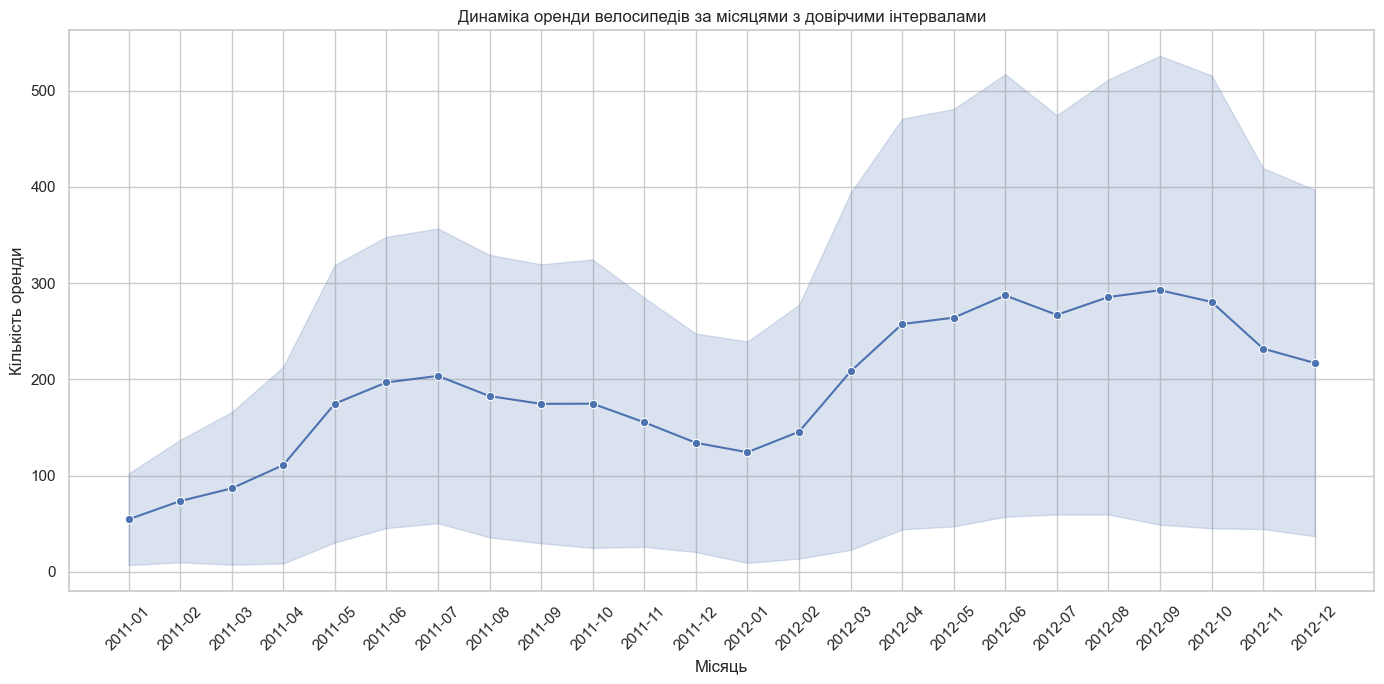

In [3]:
df['month_year'] = df.index.to_period('M').astype(str)
plt.figure(figsize=(14, 7))                                    
sns.lineplot(data=df, x='month_year', y='count', errorbar='sd', marker='o')
plt.title('Динаміка оренди велосипедів за місяцями з довірчими інтервалами')
plt.xlabel('Місяць')
plt.ylabel('Кількість оренди')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Найбільша невизначенність у 2011році - 5,6,7 місяці, а у 2012році - 5,6 та 8,9 місяці.**

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

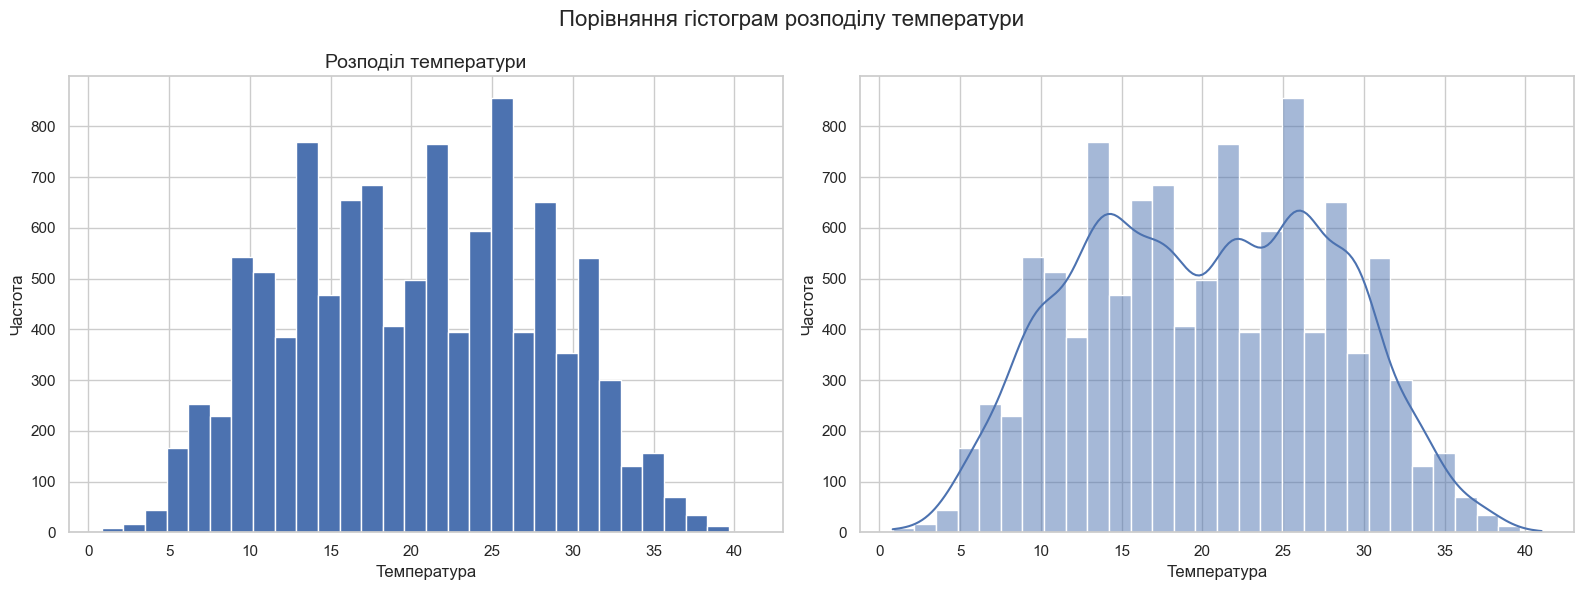

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df['temp'].hist(bins=30, ax=ax1)
ax1.set_title('Розподіл температури', fontsize=14)
ax1.set_xlabel('Температура', fontsize=12)
ax1.set_ylabel('Частота', fontsize=12)

sns.histplot(df['temp'], bins=30, kde=True, ax=ax2)
ax2.set_xlabel('Температура', fontsize=12)
ax2.set_ylabel('Частота', fontsize=12)
plt.suptitle('Порівняння гістограм розподілу температури', fontsize=16)
plt.tight_layout()
plt.show()

**1. Візуальна різниця це додаткова лінія.**

**2. Додаткова лінія KDE-оцінка щільності ядра. Вона дозволяє легше побачити піки, допомагає згладити** **,незважаючи на обрану кількість бінів.**

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

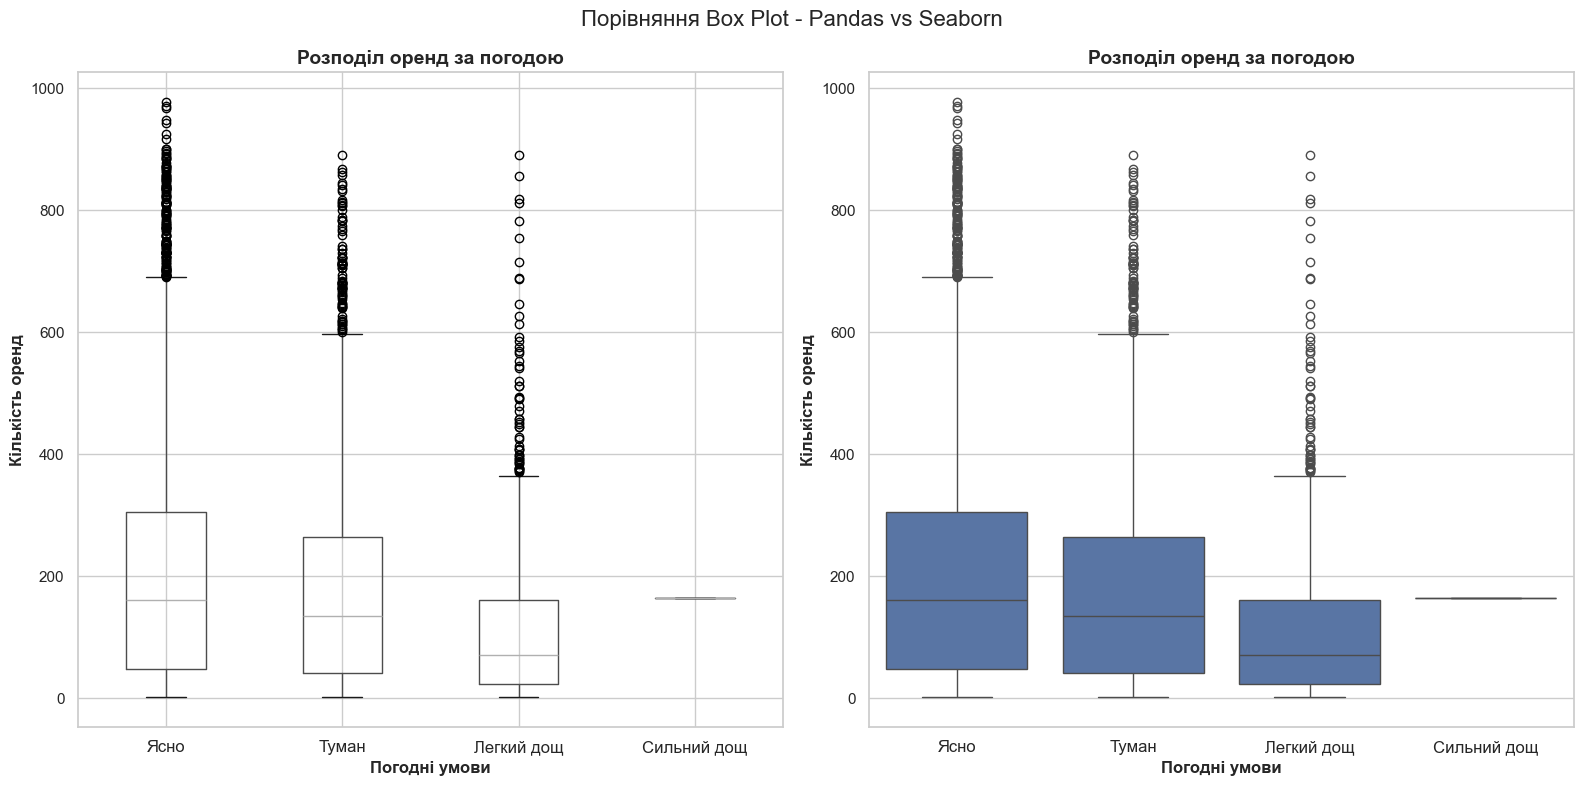

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
df.boxplot(column='count', by='weather', ax=ax1)
ax1.set_title('Розподіл оренд за погодою', fontsize=14, fontweight='bold')
ax1.set_xlabel('Погодні умови', fontsize=12, fontweight='bold')
ax1.set_ylabel('Кількість оренд', fontsize=12, fontweight='bold')
weather_labels = ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ']
unique_weather = sorted(df['weather'].unique())
ax1.set_xticks(unique_weather)
ax1.set_xticklabels(weather_labels, fontsize=12)

sns.boxplot(x='weather', y='count', data=df, ax=ax2)
ax2.set_title('Розподіл оренд за погодою', fontsize=14, fontweight='bold')
ax2.set_xlabel('Погодні умови', fontsize=12, fontweight='bold')
ax2.set_ylabel('Кількість оренд', fontsize=12, fontweight='bold')
ax2.set_xticks(range(len(weather_labels)))
ax2.set_xticklabels(weather_labels, fontsize=12)

plt.suptitle('Порівняння Box Plot - Pandas vs Seaborn', fontsize=16)
plt.tight_layout()
plt.show()

**За змістом обидва графіки показують одне й теж, але Seaborn графік стильніший, додались кольори, ширина**
**бокс плотів візуально виглядає краще.**

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


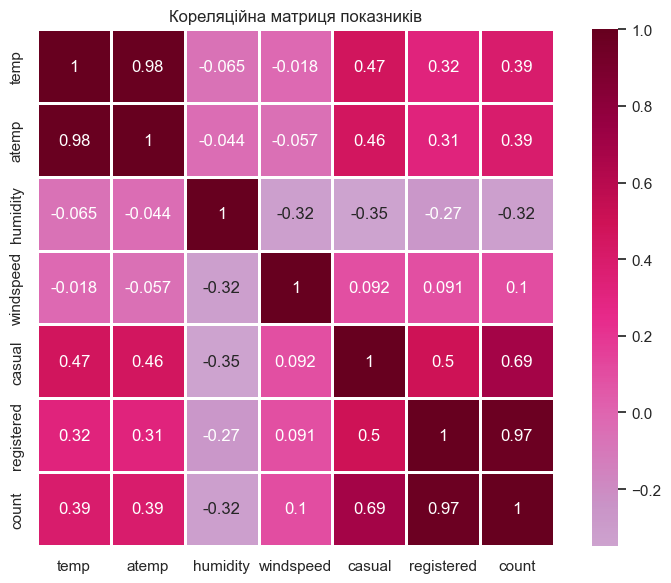

In [6]:
correlation = df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='PuRd', center=0, square=True, linewidths=1)
plt.title('Кореляційна матриця показників')
plt.tight_layout()
plt.show()


**1. Найсильніше позитивна кореляція count з registered(0.97) та з casual(0.69).**

**2. Кореляція між temp та atemp висока(0.98), це позитивна та висока кореляція. Бо atemp розраховується на**
**основі temp.**

**3. Негативну кореляцію мають temp з windspeed(-0.018), temp з humidity(-0.065), atempз  windspeed(-0.057),**
**atemp з humidity(-0.044), humidity з count(-0.32), humidity з registered(-0.27), humidity з casual(-0.35)**
**humidity з windspeed(-0.32).**

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за сезонами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому сезоні найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


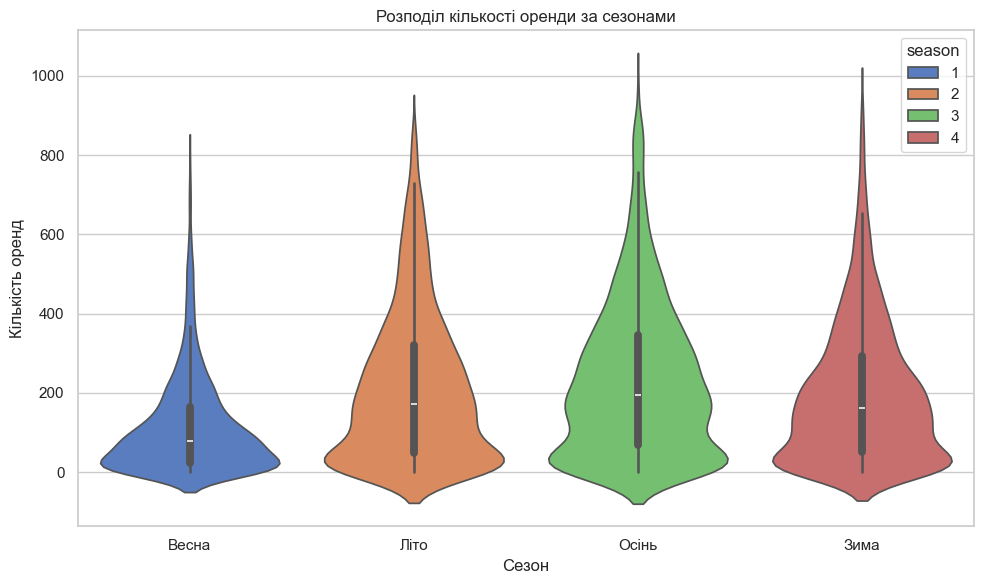

In [7]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='season', y='count', data=df, hue='season', palette='muted')
plt.title('Розподіл кількості оренди за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Кількість оренд')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Весна', 'Літо', 'Осінь', 'Зима'])
plt.tight_layout()
plt.show()

**1. Товщина violin plot показує на щільність данихю**

**2. Найбільша варіабельність влітку та восени**

**3. Перевага violin plot в тому, що показує не тільки медіану та квартилі а й форму розподілу і щільність даних.**

## Завдання 6: Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте сезон.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше змінюється від сезону?

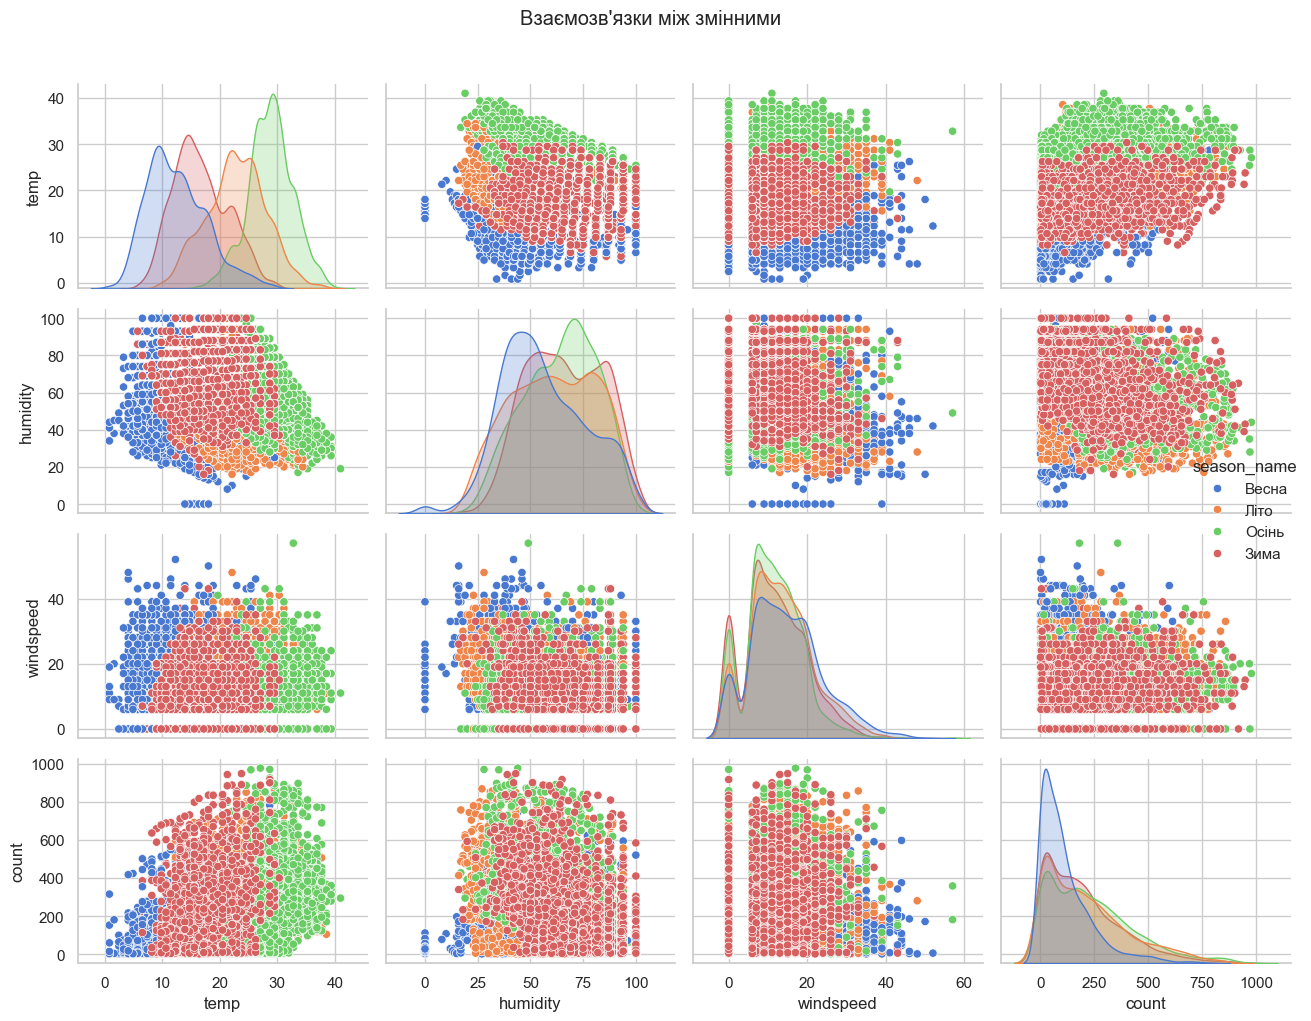

In [8]:
season_labels = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
df['season_name'] = df['season'].map(season_labels)
sns.pairplot(df, vars=['temp', 'humidity', 'windspeed', 'count'],
             hue='season_name', height=2.5, aspect=1.2, palette='muted')
plt.suptitle("Взаємозв'язки між змінними", y=1.02)
plt.tight_layout()
plt.show()

**1. Найсильніший лінійний зв'язок між temp і count.**

**2. Найбільше змінюється від сезону - характертстика temp.**

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

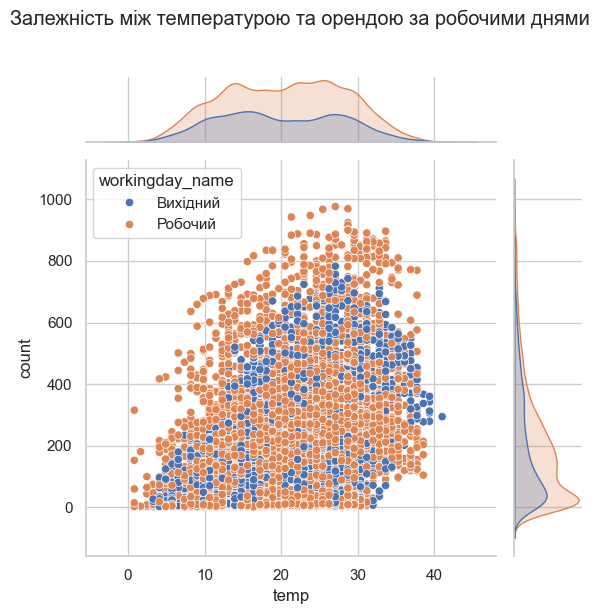

In [9]:
df['workingday_name'] = df['workingday'].map({0: 'Вихідний', 1: 'Робочий'})
sns.jointplot(data=df, x='temp', y='count', hue='workingday_name')
plt.suptitle('Залежність між температурою та орендою за робочими днями', y=1.02)
plt.tight_layout()
plt.show()

**1. Розподіли для кожної змінної(зверху для температури а збоку для оренд).**

**2. Так, у робочі дні кількість оренд вища, у вихідні оренди теж непогані, але вони зосереджені в нижчих**
**значеннях.**